# Creating additional figures

Importing required libraries

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
from sklearn.decomposition import PCA

In [2]:
def path(folders: tuple, filename: str) -> str:
    # Get path from main project folder
    return os.path.join(os.pardir, *folders,  filename)

### Subplots for models results

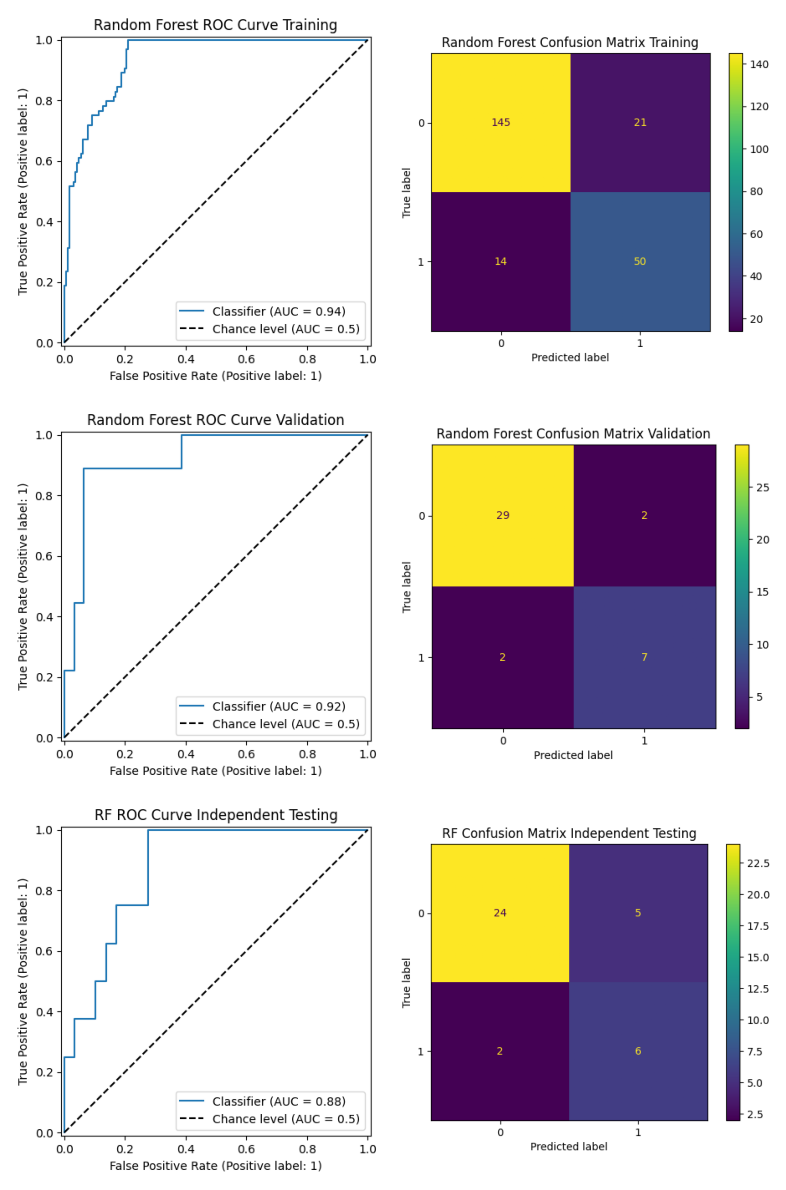

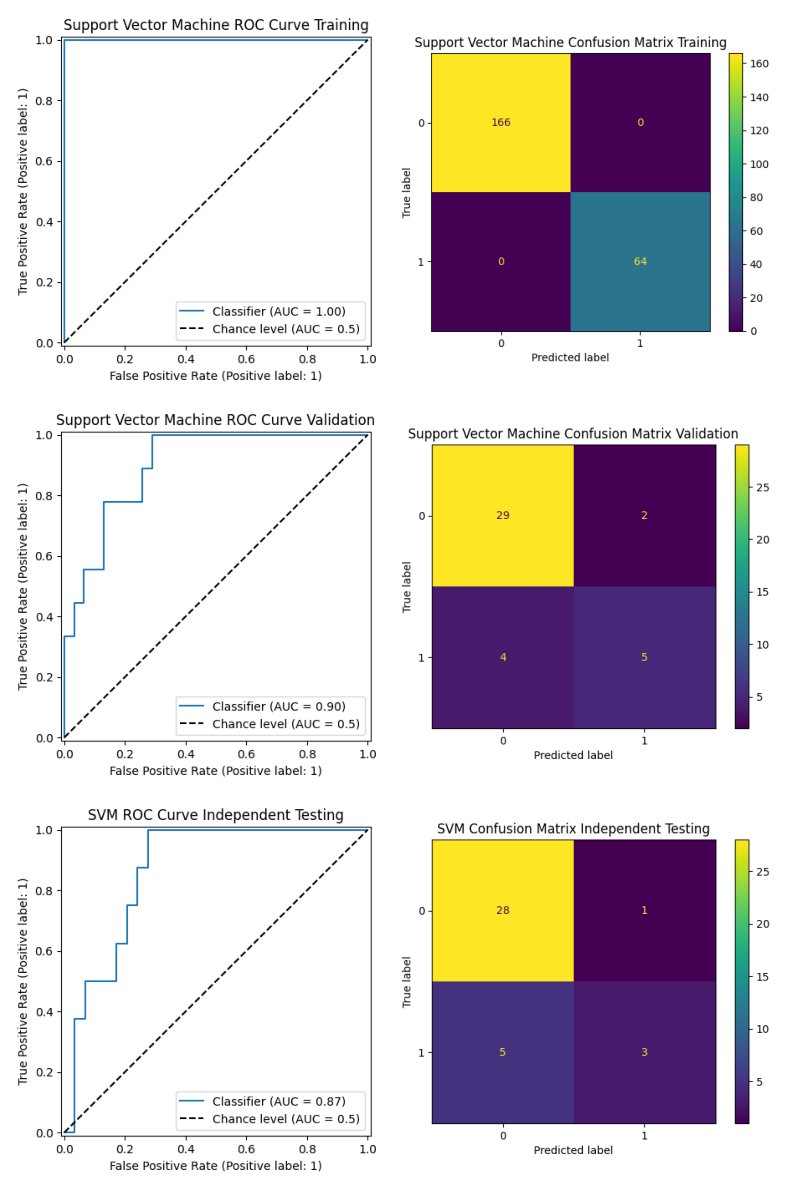

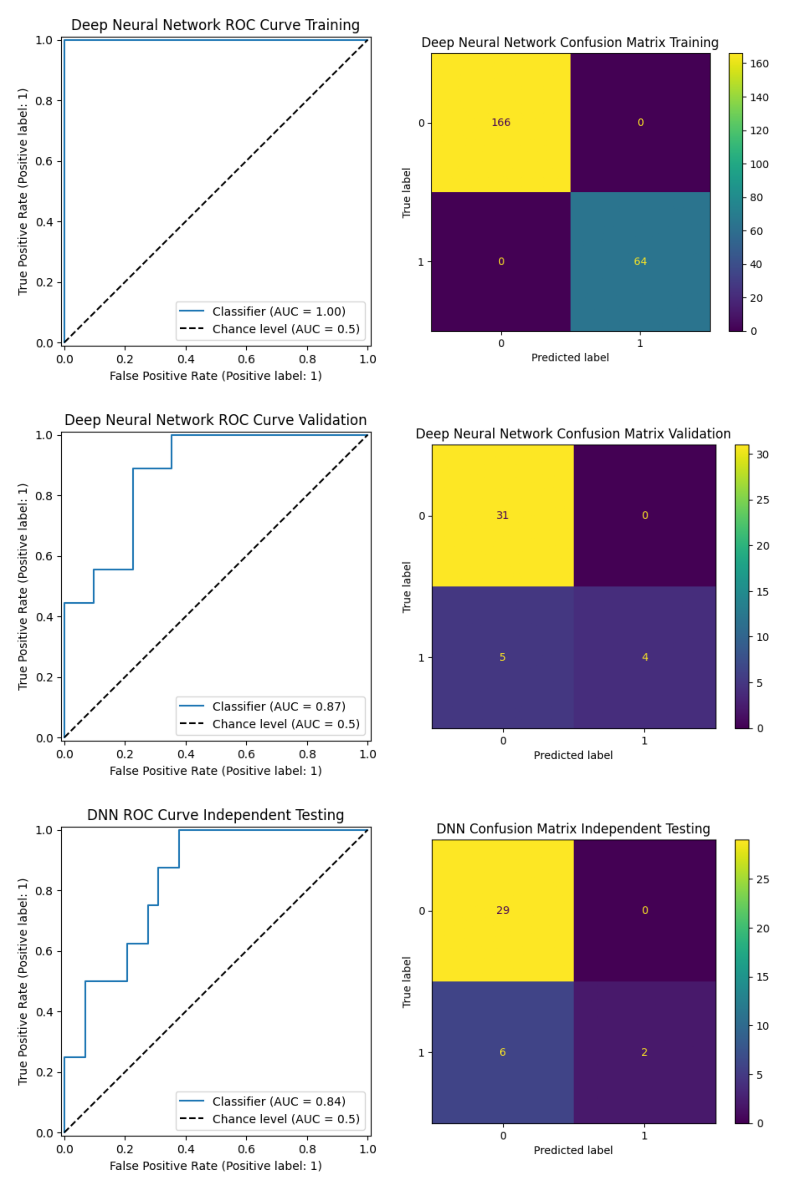

In [4]:
for model in ['rf', 'svm', 'dnn']: 
    
    # Load ROC curves and confusion matrices
    fig_res = ('figures', 'results',)
    train_roc = mpimg.imread(path(fig_res, f'{model}_roc_train.png'))
    valid_roc = mpimg.imread(path(fig_res, f'{model}_roc_valid.png'))
    test_roc = mpimg.imread(path(fig_res, f'{model}_roc_test.png'))
    train_cm = mpimg.imread(path(fig_res, f'{model}_cm_train.png'))
    valid_cm = mpimg.imread(path(fig_res, f'{model}_cm_valid.png'))
    test_cm = mpimg.imread(path(fig_res, f'{model}_cm_test.png'))
    
    imgs = [train_roc, train_cm, valid_roc, valid_cm, test_roc, test_cm]
    fig, axs = plt.subplots(3, 2, figsize=(8, 12))
    
    # Plot images
    for i, ax in enumerate(axs.flat):
        if i < len(imgs):
            ax.imshow(imgs[i])
            ax.axis('off')
        else:
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()

### Boxplot for 10 most significant features

Load the sorted features importance from 'features_importance.tsv'

In [47]:
features_importance = pd.read_csv(path(('data',), 'features_importance.tsv'), sep="\t",  index_col=0)
features_importance.head()

,importance
ENSG00000272398.5,0.084869
ENSG00000160209.18,0.051016
ENSG00000196586.13,0.034580
ENSG00000102145.13,0.029885
ENSG00000174175.16,0.029608


Take the top 10 features

In [48]:
features_importance_10 = features_importance.head(10)
features_importance_10

,importance
ENSG00000272398.5,0.084869
ENSG00000160209.18,0.051016
ENSG00000196586.13,0.034580
ENSG00000102145.13,0.029885
ENSG00000174175.16,0.029608
ENSG00000183508.4,0.025826
ENSG00000101162.3,0.021367
ENSG00000274536.6,0.021184
ENSG00000127533.3,0.019813
ENSG00000162367.11,0.019457


In [128]:
features_importance_10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, ENSG00000272398.5 to ENSG00000162367.11
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   importance  10 non-null     float64
dtypes: float64(1)
memory usage: 460.0+ bytes


In [49]:
features_10_ids = features_importance_10.index.tolist()
features_10_ids

['ENSG00000272398.5',
 'ENSG00000160209.18',
 'ENSG00000196586.13',
 'ENSG00000102145.13',
 'ENSG00000174175.16',
 'ENSG00000183508.4',
 'ENSG00000101162.3',
 'ENSG00000274536.6',
 'ENSG00000127533.3',
 'ENSG00000162367.11']

Load the CTCs data to get values for those 10 features

In [50]:
ctc_dataset = pd.read_csv(path(('data',), 'ctc_dataset.tsv'), sep="\t",  index_col=0)
ctc_dataset.head()

,ENSG00000223972.5,ENSG00000227232.5,ENSG00000278267.1,ENSG00000243485.5,ENSG00000237613.2,ENSG00000268020.3,ENSG00000240361.1,ENSG00000186092.4,ENSG00000238009.6,ENSG00000233750.3,...,ENSG00000210176.1,ENSG00000210184.1,ENSG00000210191.1,ENSG00000198786.2,ENSG00000198695.2,ENSG00000210194.1,ENSG00000198727.2,ENSG00000210195.2,ENSG00000210196.2,state
BRx_42_1_10_20_CTC_jor,0.0,0.0,0.0,0,0,0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,3.321928,3.169925,0.0,5.672425,0.0,0.000000,0
BRx_42_1_9_14_CTC_jor,0.0,0.0,0.0,0,0,0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,7.000000,4.906891,0.0,7.285402,0.0,3.906891,1
BRx_42_1_9_22_CTC_jor,0.0,0.0,0.0,0,0,0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,9.939579,7.686501,0.0,11.787086,0.0,3.584963,0
BRx_42_1_9_29_CTC_jor,0.0,1.0,0.0,0,0,0,0.0,0,0.0,1.0,...,0.0,0.0,0.0,15.793933,14.232046,0.0,17.634457,0.0,9.710806,0
BRx_42_2_9_14_CTC_jor,0.0,0.0,0.0,0,0,0,0.0,0,0.0,2.0,...,0.0,0.0,0.0,12.014369,10.260920,0.0,13.001584,0.0,4.392317,0


In [117]:
ctc_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307 entries, BRx_42_1_10_20_CTC_jor to X245_CTC_mar
Columns: 52763 entries, ENSG00000223972.5 to state
dtypes: float64(48523), int64(4240)
memory usage: 123.6+ MB


Get only the 10 features and state column

In [52]:
ctc_10_features = ctc_dataset.loc[:, [*features_10_ids, 'state']]
ctc_10_features

,ENSG00000272398.5,ENSG00000160209.18,ENSG00000196586.13,ENSG00000102145.13,ENSG00000174175.16,ENSG00000183508.4,ENSG00000101162.3,ENSG00000274536.6,ENSG00000127533.3,ENSG00000162367.11,state
BRx_42_1_10_20_CTC_jor,9.948367,5.392317,0.000000,6.169925,0.000000,8.894818,2.321928,0.000000,0.000000,0.000000,0
BRx_42_1_9_14_CTC_jor,0.000000,0.000000,0.000000,0.000000,0.000000,8.199672,0.000000,0.000000,0.000000,3.321928,1
BRx_42_1_9_22_CTC_jor,9.702173,0.000000,6.870365,0.000000,1.000000,8.985842,2.000000,0.000000,0.000000,0.000000,0
BRx_42_1_9_29_CTC_jor,13.343186,6.375039,11.110483,4.584963,0.000000,9.560333,1.000000,0.000000,0.000000,1.000000,0
BRx_42_2_9_14_CTC_jor,10.648358,6.129283,7.965784,0.000000,0.000000,6.491853,4.700440,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
X31_CTC_mar,3.807355,0.000000,3.584963,1.000000,0.000000,0.000000,7.807355,3.906891,0.000000,0.000000,0
X47_CTC_mar,9.552669,0.000000,0.000000,0.000000,0.000000,5.643856,0.000000,0.000000,0.000000,0.000000,0
X207_CTC_mar,6.087463,0.000000,0.000000,0.000000,4.857981,2.807355,12.490099,0.000000,8.285402,0.000000,1
X218_CTC_mar,0.000000,5.906891,0.000000,0.000000,0.000000,0.000000,5.781360,0.000000,0.000000,0.000000,0


Prepare feature gens names

In [57]:
box_titles = {
    'ENSG00000101162.3': 'TUBB1',
    'ENSG00000102145.13': 'GATA1',
    'ENSG00000127533.3': 'F2RL3',
    'ENSG00000160209.18': 'PDXK',
    'ENSG00000162367.11': 'TAL1',
    'ENSG00000174175.16': 'SELP',
    'ENSG00000183508.4': 'TENT5C',
    'ENSG00000196586.13': 'MYO6',
    'ENSG00000272398.5': 'CD24',
    'ENSG00000274536.6': 'MIR223HG',
}

Create boxplots

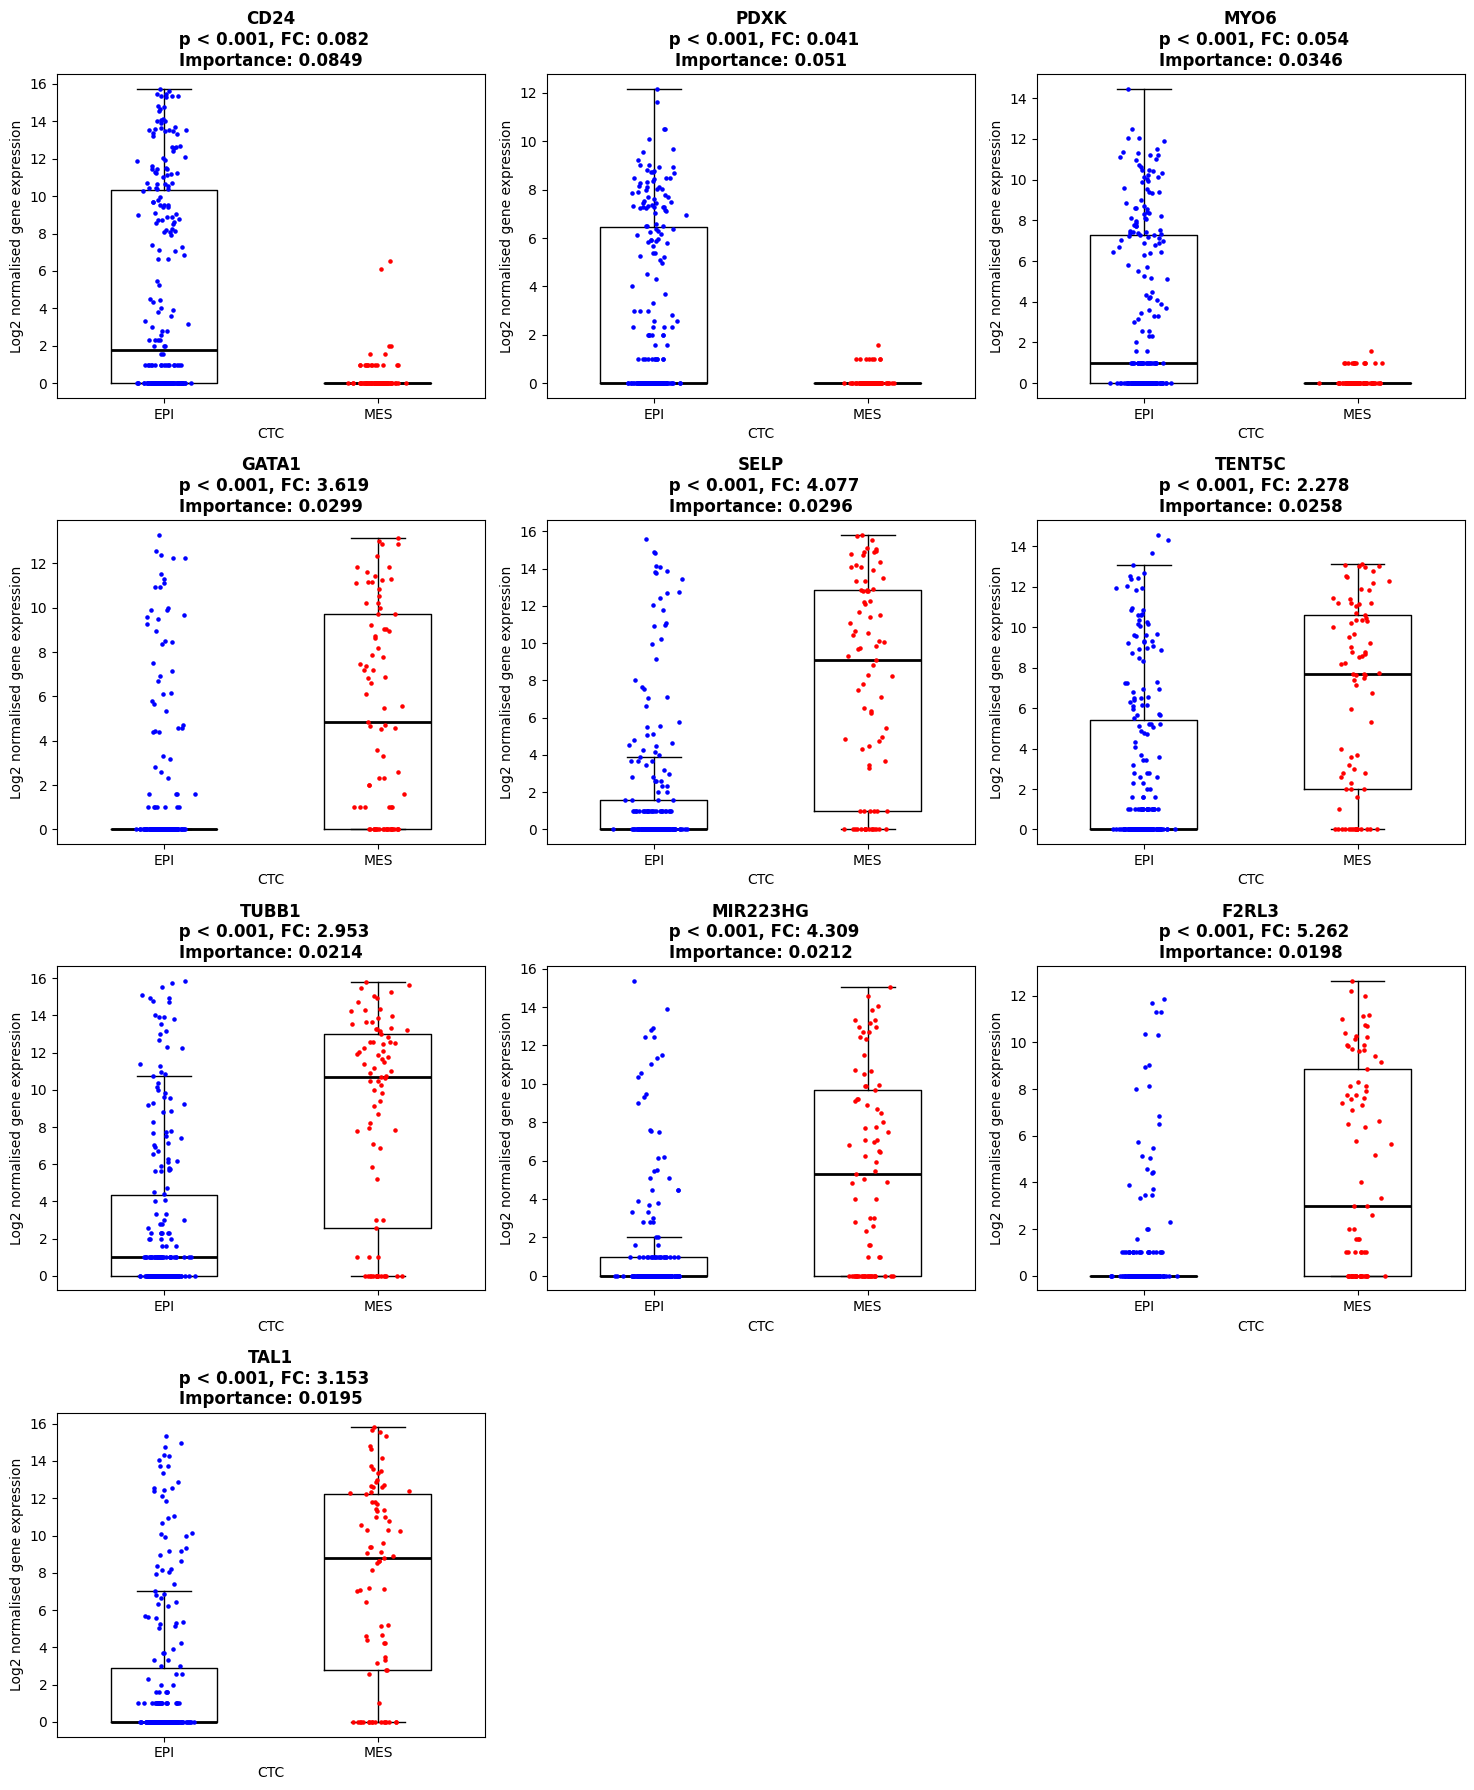

In [135]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 18))

for i, column in enumerate(features_10_ids):
    row = i // 3
    col = i % 3
    
    # Data for epithelial(0) and mesenchymal(1) cells
    data_state_0 = ctc_10_features[ctc_10_features['state'] == 0][column]
    data_state_1 = ctc_10_features[ctc_10_features['state'] == 1][column]
    
    axes[row, col].boxplot([data_state_0, data_state_1], 
                        showfliers=False,
                        medianprops=dict(linewidth=2, color='k'),
                        widths=[0.5,0.5],
                        labels=['EPI', 'MES'])
    
    colors ={0: 'b', 1: 'r'}
    for state in [0,1]:
        y = data_state_0 if state == 0 else data_state_1
        x = np.random.normal(state+1, 0.05, size=len(y))
        axes[row, col].plot(x, y, '.', color=colors[state], alpha=1, zorder=3, markersize=4.5)
    
    # Calculate statistics p-value and fold change
    t_stat, p_value = ttest_ind(data_state_0, data_state_1)
    p_value = round(p_value,3)
    
    mean_class_0 = data_state_0.mean()
    mean_class_1 = data_state_1.mean()
    fold_change = round(mean_class_1 / mean_class_0, 3)

    importance = round(features_importance_10.loc[column, 'importance'], 4)
    
    # Add title and labels
    if p_value < 0.001:
        axes[row, col].set_title(f"{box_titles[column]}\n p < 0.001, FC: {fold_change}\nImportance: {importance}", fontweight="bold")
    else: 
        axes[row, col].set_title(f"{box_titles[column]}\n p: {p_value}, FC: {fold_change}", fontweight="bold")
    axes[row, col].set_xlabel('CTC')
    axes[row, col].set_ylabel('Log2 normalised gene expression')

# Layout adjust
fig.subplots_adjust(wspace=1.5)
plt.tight_layout()

# Remove unused subplots
fig.delaxes(axes[3][1])
fig.delaxes(axes[3][2])

plt.show()

### Principal component analysis (PCA)

In [15]:
ctc_dataset = pd.read_csv(path(('data',), 'ctc_dataset.tsv'), sep="\t",  index_col=0)
ctc_dataset.head()

,ENSG00000223972.5,ENSG00000227232.5,ENSG00000278267.1,ENSG00000243485.5,ENSG00000237613.2,ENSG00000268020.3,ENSG00000240361.1,ENSG00000186092.4,ENSG00000238009.6,ENSG00000233750.3,...,ENSG00000210176.1,ENSG00000210184.1,ENSG00000210191.1,ENSG00000198786.2,ENSG00000198695.2,ENSG00000210194.1,ENSG00000198727.2,ENSG00000210195.2,ENSG00000210196.2,state
BRx_42_1_10_20_CTC_jor,0.0,0.0,0.0,0,0,0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,3.321928,3.169925,0.0,5.672425,0.0,0.000000,0
BRx_42_1_9_14_CTC_jor,0.0,0.0,0.0,0,0,0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,7.000000,4.906891,0.0,7.285402,0.0,3.906891,1
BRx_42_1_9_22_CTC_jor,0.0,0.0,0.0,0,0,0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,9.939579,7.686501,0.0,11.787086,0.0,3.584963,0
BRx_42_1_9_29_CTC_jor,0.0,1.0,0.0,0,0,0,0.0,0,0.0,1.0,...,0.0,0.0,0.0,15.793933,14.232046,0.0,17.634457,0.0,9.710806,0
BRx_42_2_9_14_CTC_jor,0.0,0.0,0.0,0,0,0,0.0,0,0.0,2.0,...,0.0,0.0,0.0,12.014369,10.260920,0.0,13.001584,0.0,4.392317,0


In [16]:
states = ctc_dataset.loc[:, ['state']]
states

,state
BRx_42_1_10_20_CTC_jor,0
BRx_42_1_9_14_CTC_jor,1
BRx_42_1_9_22_CTC_jor,0
BRx_42_1_9_29_CTC_jor,0
BRx_42_2_9_14_CTC_jor,0
...,...
X31_CTC_mar,0
X47_CTC_mar,0
X207_CTC_mar,1
X218_CTC_mar,0


In [17]:
ctc_dataset.drop('state', axis=1, inplace=True)
ctc_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307 entries, BRx_42_1_10_20_CTC_jor to X245_CTC_mar
Columns: 52762 entries, ENSG00000223972.5 to ENSG00000210196.2
dtypes: float64(48523), int64(4239)
memory usage: 123.6+ MB


In [19]:
pca = PCA(n_components=2)
pca.fit(ctc_dataset)
transformed_data = pca.transform(ctc_dataset)
transformed_data = pd.DataFrame(transformed_data, index=ctc_dataset.index, columns=['PC1', 'PC2'])
transformed_data

,PC1,PC2
BRx_42_1_10_20_CTC_jor,-42.547421,-61.012393
BRx_42_1_9_14_CTC_jor,3.503525,-16.582046
BRx_42_1_9_22_CTC_jor,81.280451,-49.049632
BRx_42_1_9_29_CTC_jor,416.284825,-42.039908
BRx_42_2_9_14_CTC_jor,225.803652,-42.152851
...,...,...
X31_CTC_mar,-82.745170,-32.853095
X47_CTC_mar,-32.108955,-10.817356
X207_CTC_mar,-29.046759,67.494454
X218_CTC_mar,-54.451521,-37.490949


In [20]:
transformed_data['state'] = states

In [21]:
transformed_data

,PC1,PC2,state
BRx_42_1_10_20_CTC_jor,-42.547421,-61.012393,0
BRx_42_1_9_14_CTC_jor,3.503525,-16.582046,1
BRx_42_1_9_22_CTC_jor,81.280451,-49.049632,0
BRx_42_1_9_29_CTC_jor,416.284825,-42.039908,0
BRx_42_2_9_14_CTC_jor,225.803652,-42.152851,0
...,...,...,...
X31_CTC_mar,-82.745170,-32.853095,0
X47_CTC_mar,-32.108955,-10.817356,0
X207_CTC_mar,-29.046759,67.494454,1
X218_CTC_mar,-54.451521,-37.490949,0


                                  PC1        PC2  state
BRx_42_1_10_20_CTC_jor     -42.547421 -61.012393      0
BRx_42_1_9_22_CTC_jor       81.280451 -49.049632      0
BRx_42_1_9_29_CTC_jor      416.284825 -42.039908      0
BRx_42_2_9_14_CTC_jor      225.803652 -42.152851      0
BRx_42_2_9_29_CTC_jor      382.027264 -46.152138      0
BRx_42_3_9_29_CTC_jor      460.741658 -19.038906      0
BRx_82_1_9_29_CTC_jor      363.838198 -55.583951      0
BRx_82_1_030915_CTC_jor    218.371738 -54.357559      0
BRx_82_1_11_13_14_CTC_jor  360.929169 -34.525623      0
BRx_82_1_1_12_15_CTC_jor   263.595775 -57.660602      0
                                   PC1         PC2  state
BRx_42_1_9_14_CTC_jor         3.503525  -16.582046      1
BRx_82_2_9_15_CTC_jor       203.412617  280.484469      1
BRx_82_2_9_29_CTC_jor      -139.265883   -0.423903      1
BRx_42_2_110314_CTC_jor    -107.915224   87.810681      1
BRx_82_1_012015_CTC_jor      34.359262  180.077140      1
BRx_111_2_10_08_15_CTC_jor -160.2671

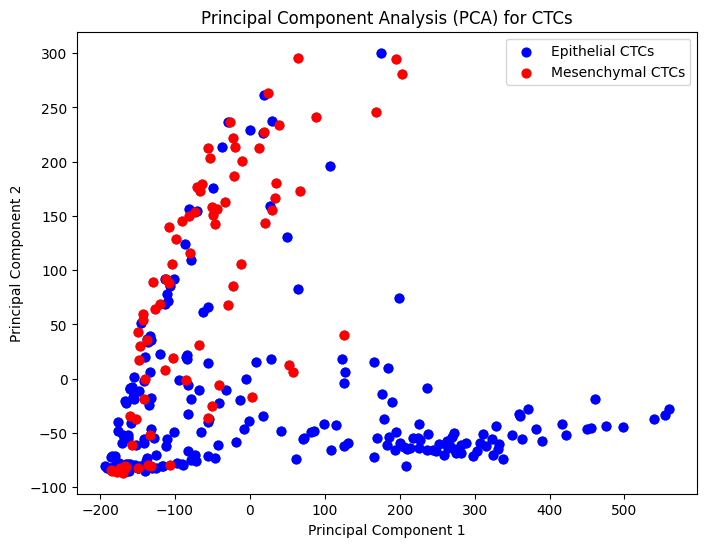

In [46]:
plt.figure(figsize=(8, 6))

plt.scatter(transformed_data['PC1'], transformed_data['PC2'])

colors_labels ={0: ('b', 'Epithelial CTCs'), 1: ('r', 'Mesenchymal CTCs')}
for state, (color, label) in colors_labels.items():
    subset = transformed_data[transformed_data['state'] == state]
    print(subset.head(10))
    plt.scatter(subset['PC1'], subset['PC2'], label=label, color=color, s=40)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Component Analysis (PCA) for CTCs')
plt.legend()
plt.show()